# Template Notebook

## Setup

### Standard library imports

In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

In [16]:
%autoreload 2

import numpy as np
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from source.spea_optimizer import SPEAOptimizer

In [17]:
sns.set()

### Setup objective function

In [18]:
def schaffer_function(x):
    return [x**2, (x - 2)**2]

In [19]:
print(SPEAOptimizer.__doc__)


    Class holds implementation of Strength Pareto Evolutionary Algorithm.
    For more details on the algorithm see: README.md

    :param objective: multi objective function to optimize,
                      takes and returns numpy arrays where each input element is variable
                      and each output is one of component objectives
    :param n_dim: number of input dimensions of objective, it can not be deduced because of dynamic typing
    :param mode: optimization mode, valid options are `min`, `max`, `strict_min` or `strict_max`
    :param selection_operator: genetic operator preforming selection operation, str or callable
                               if str valid options are `n_fittest` and `binary_tournament`
                               if callable should, take in population to select from,
                               mating pool size and optimization mode
    :param mutation_operator: genetic operator preforming mutation, str or callable
                    

In [20]:
optimzier = SPEAOptimizer(
    schaffer_function,
    n_dim=1,
    mode="min",
    mutation_operator="gaussian",
    crossover_operator="center",
    selection_operator="binary_tournament",
    clustering_method="affinity_propagation"
)

In [21]:
history = optimzier.optimize(
    generations=100,
    population_size=100,
    crossover_rate=0.8,
    mutation_rate=0.4,
    reducing_period=1,
    search_range=((-10, 10),),
    mutation_strength=1,
    clustering_parameters={"max_iter": 50},
    silent=False,
    logging=False,
)

100%|██████████| 100/100 [00:18<00:00,  5.72it/s]


In [30]:
pareto_front = optimzier.pareto_front(n_solutions=40)

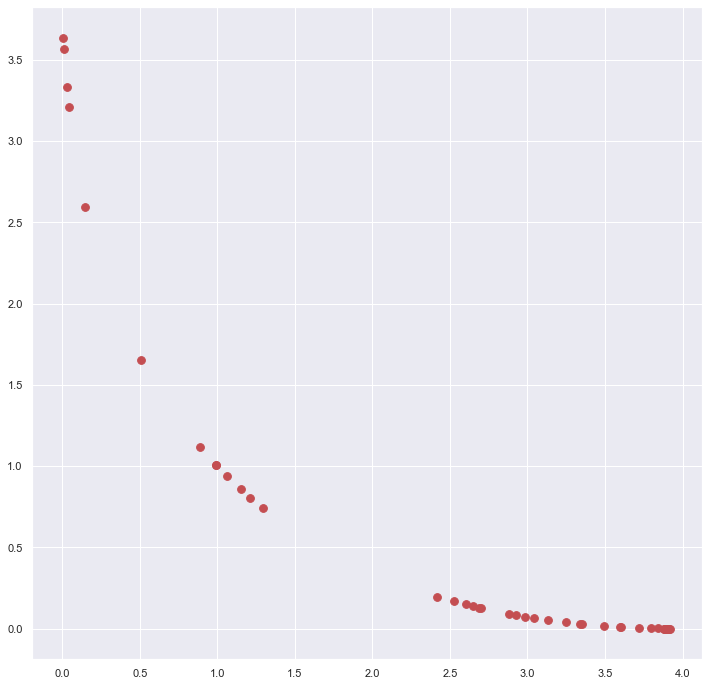

In [31]:
plt.figure(figsize=[12, 12])

values = np.apply_along_axis(schaffer_function, 0, pareto_front)
plt.scatter(values[0, :], values[1, :], c="r", s=60)

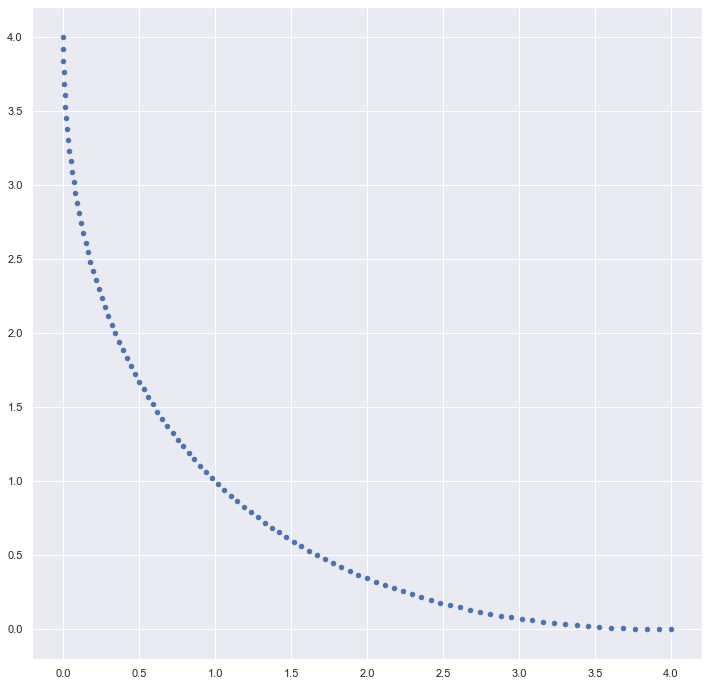

In [24]:
plt.figure(figsize=[12, 12])

t = np.linspace(0, 2, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)

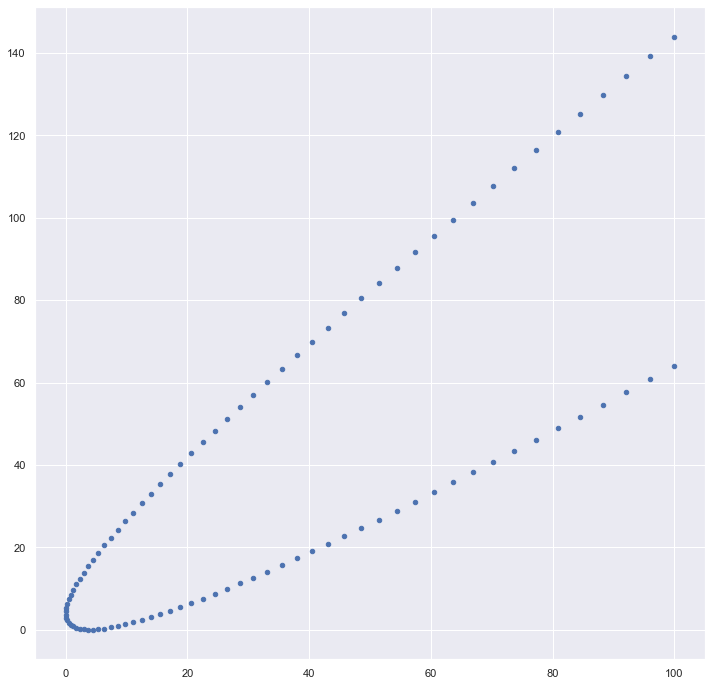

In [25]:
plt.figure(figsize=[12, 12])

t = np.linspace(-10, 10, 100)
t_values = np.apply_along_axis(schaffer_function, 0, t)
plt.scatter(t_values[0, :], t_values[1, :], c="b", s=20)